In [1]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-02-15
# Use this script to compare expected performance with actual performance with 3 year increments.

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# It uses yahoo finance api to get close price for each ticker stock/ETF.
# use any 3 tickers, I just use vanguard ETFs.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed.

# num_simulation = 3000
assets = ['APD', 'BTI', 'COST','CWEN-A', 'MFA', 'MPW','NLY','NYMT','PAA','PFFV','VGT','VOO','VUG','GOOGL','VZ','PYPL','VIG','HDV','VHT']
money_invested = [3852,884,1421,8569,3507,3411,5958,3120,3547,5809,7945,15912,14171,7627,5362,2492,1638,1066,255]
if len(assets) == len(money_invested):
    pf_data = pd.DataFrame()
    weights = money_invested
    weights /= np.sum(weights)

    for a in assets:
        #you can chagne the start date to any date in 'yyyy-mm-dd' format and end = 'yyyy-mm-dd'.
        pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2019-1-1')['Adj Close'] 
else:
    raise Exception

In [3]:
# pf_data.head() #makre sure companies were public at starting date

In [4]:
# pf_data.tail() #check companies still open and public at ending date

<AxesSubplot:xlabel='Date'>

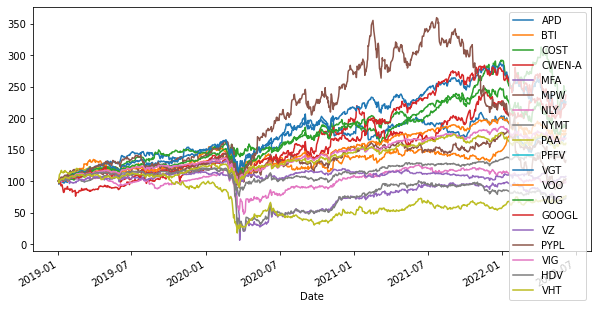

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
indi_return = log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,APD,BTI,COST,CWEN-A,MFA,MPW,NLY,NYMT,PAA,PFFV,VGT,VOO,VUG,GOOGL,VZ,PYPL,VIG,HDV,VHT
APD,0.089381,0.035041,0.035093,0.049216,-0.008302,0.058368,0.047065,0.036304,0.060260,0.005493,0.055174,0.049518,0.049824,0.047624,0.026857,0.059832,0.047142,0.044925,0.041631
BTI,0.035041,0.076176,0.019539,0.034012,0.010351,0.046956,0.033243,0.036687,0.056580,0.003025,0.033745,0.033653,0.031153,0.029767,0.020771,0.031755,0.031917,0.035237,0.029861
COST,0.035093,0.019539,0.058422,0.031034,0.014757,0.032735,0.019376,0.018824,0.018130,0.004337,0.044095,0.034999,0.040710,0.038562,0.018980,0.044917,0.033034,0.026075,0.029851
CWEN-A,0.049216,0.034012,0.031034,0.131270,0.045366,0.062732,0.048943,0.075195,0.081663,0.006061,0.049878,0.045377,0.046360,0.040288,0.025234,0.055730,0.041971,0.039530,0.040052
MFA,-0.008302,0.010351,0.014757,0.045366,1.886438,0.087754,0.152066,0.727176,0.108823,0.007513,-0.005568,0.007662,0.002866,-0.003362,0.030251,-0.034701,0.005622,0.013627,0.001853
MPW,0.058368,0.046956,0.032735,0.062732,0.087754,0.132339,0.072138,0.112558,0.097558,0.006849,0.058890,0.056543,0.056265,0.052846,0.032594,0.063467,0.052544,0.051942,0.048473
NLY,0.047065,0.033243,0.019376,0.048943,0.152066,0.072138,0.129382,0.149079,0.113837,0.005865,0.042875,0.045589,0.041489,0.034854,0.021238,0.044195,0.040881,0.045344,0.033849
NYMT,0.036304,0.036687,0.018824,0.075195,0.727176,0.112558,0.149079,0.521833,0.202370,0.008593,0.044762,0.049265,0.045652,0.040814,0.027936,0.038739,0.041187,0.045943,0.034377
PAA,0.060260,0.056580,0.018130,0.081663,0.108823,0.097558,0.113837,0.202370,0.375392,0.007793,0.065593,0.068784,0.062620,0.061081,0.024179,0.066654,0.056917,0.069192,0.050141
PFFV,0.005493,0.003025,0.004337,0.006061,0.007513,0.006849,0.005865,0.008593,0.007793,0.006526,0.009448,0.006603,0.008785,0.008876,0.001400,0.012458,0.005104,0.003630,0.005093


In [9]:
log_returns.corr() #get correlation between each pair.

,APD,BTI,COST,CWEN-A,MFA,MPW,NLY,NYMT,PAA,PFFV,VGT,VOO,VUG,GOOGL,VZ,PYPL,VIG,HDV,VHT
APD,1.000000,0.424657,0.485628,0.454359,-0.020219,0.536671,0.437659,0.168098,0.328977,0.271224,0.644742,0.730724,0.649699,0.520189,0.473754,0.447445,0.763077,0.712481,0.667869
BTI,0.424657,1.000000,0.292893,0.340128,0.027306,0.467664,0.334858,0.184007,0.334587,0.170480,0.427141,0.537926,0.440026,0.352197,0.396887,0.257238,0.559626,0.605334,0.518911
COST,0.485628,0.292893,1.000000,0.354375,0.044452,0.372294,0.222858,0.107809,0.122424,0.225416,0.637349,0.638825,0.656607,0.520989,0.414121,0.415478,0.661393,0.511499,0.592328
CWEN-A,0.454359,0.340128,0.354375,1.000000,0.091164,0.475950,0.375551,0.287305,0.367877,0.254529,0.480953,0.552542,0.498839,0.363125,0.367305,0.343899,0.560600,0.517313,0.530203
MFA,-0.020219,0.027306,0.044452,0.091164,1.000000,0.175631,0.307805,0.732913,0.129317,0.279850,-0.014164,0.024611,0.008136,-0.007992,0.116155,-0.056487,0.019808,0.047041,0.006472
MPW,0.536671,0.467664,0.372294,0.475950,0.175631,1.000000,0.551299,0.428320,0.437700,0.331649,0.565559,0.685714,0.602967,0.474383,0.472512,0.390058,0.698985,0.676992,0.639083
NLY,0.437659,0.334858,0.222858,0.375551,0.307805,0.551299,1.000000,0.573738,0.516542,0.347737,0.416436,0.559154,0.449666,0.316429,0.311391,0.274701,0.550014,0.597705,0.451340
NYMT,0.168098,0.184007,0.107809,0.287305,0.732913,0.428320,0.573738,1.000000,0.457233,0.343476,0.216479,0.300870,0.246368,0.184500,0.203947,0.119898,0.275919,0.301550,0.228248
PAA,0.328977,0.334587,0.122424,0.367877,0.129317,0.437700,0.516542,0.457233,1.000000,0.226310,0.374019,0.495283,0.398444,0.325550,0.208123,0.243228,0.449559,0.535447,0.392505
PFFV,0.271224,0.170480,0.225416,0.254529,0.279850,0.331649,0.347737,0.343476,0.226310,1.000000,0.464707,0.481917,0.471487,0.381818,0.110088,0.327107,0.429218,0.325320,0.405783


***

In [10]:

pfolio_returns = np.sum(weights * log_returns.mean()) * 250
pfolio_volatilities = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))
  
# portfolio.append({'portfolio_return':pfolio_returns}, ignore_index=True)

portfolio = pd.DataFrame({'assets':assets,
                          'money invested':money_invested,
                          'weights':weights,
                          'return':indi_return,
                          'pf_return':pfolio_returns,
                          'Pf_volatilities': pfolio_volatilities 
                          })
print(portfolio)

        assets  money invested   weights    return  pf_return  Pf_volatilities
APD        APD            3852  0.039898  0.162612   0.127955          0.22618
BTI        BTI             884  0.009156  0.174374   0.127955          0.22618
COST      COST            1421  0.014718  0.257379   0.127955          0.22618
CWEN-A  CWEN-A            8569  0.088756  0.249161   0.127955          0.22618
MFA        MFA            3507  0.036325 -0.079427   0.127955          0.22618
MPW        MPW            3411  0.035330  0.082136   0.127955          0.22618
NLY        NLY            5958  0.061712 -0.004432   0.127955          0.22618
NYMT      NYMT            3120  0.032316 -0.091038   0.127955          0.22618
PAA        PAA            3547  0.036739 -0.078423   0.127955          0.22618
PFFV      PFFV            5809  0.060168  0.052103   0.127955          0.22618
VGT        VGT            7945  0.082292  0.235852   0.127955          0.22618
VOO        VOO           15912  0.164813  0.163083  

In [11]:
#generate path and name then export
path = 'csv_results/'
name ='portfolio_of_' + '_'.join(assets) + '.csv'
path_name = path + name 
portfolio.to_csv(path_name)

In [12]:
#get actual portfolio return
print("Actual annual portfolio return is {:.1f}".format(pfolio_returns*100) + "%")
#get actual portfolio volatility
print("Actual annual portfolio volatility is {:.1f}".format(pfolio_volatilities*100) +"%")


Actual annual portfolio return is 12.8%
Actual annual portfolio volatility is 22.6%
